# Image Segmentation

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.cluster.vq import kmeans, vq
from pylab import plot,show
from sklearn import cluster
from scipy.misc import imread

/Users/conorbarrycullen/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/Users/conorbarrycullen/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/conorbarrycullen/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


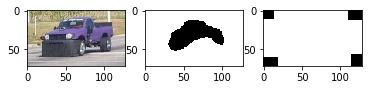

In [2]:
colourImage = imread("thanoscar.png",mode = 'RGB')/255
maskImage = imread("thanosmask.png")/255
backMaskImage = imread("backmask.png")/255
backMaskImage = backMaskImage[:,:,0:3]
maskImage[maskImage != 1] = 0
maskImage3 = maskImage[:,:,0:3]
#print(maskImage3)

threeFigs = plt.figure()
ax = threeFigs.add_subplot(131)
ax.imshow(colourImage, cmap = 'gray')

ax2 = threeFigs.add_subplot(132)
ax2.imshow(maskImage, cmap = 'gray')

ax3 = threeFigs.add_subplot(133)
ax3.imshow(backMaskImage, cmap = 'gray')

([array([ 194., 1038.,  968.,  547.,  820.,  902., 1590., 2500.,  508.,
          149.]),
  array([ 209.,  893., 1172.,  890.,  527., 1059., 2314., 1791.,  239.,
          122.]),
  array([  19.,  357., 1196., 1181., 1613., 1512., 1609., 1457.,  189.,
           83.])],
 array([0.0745098 , 0.16705882, 0.25960784, 0.35215686, 0.44470588,
        0.5372549 , 0.62980392, 0.72235294, 0.81490196, 0.90745098,
        1.        ]),
 <a list of 3 Lists of Patches objects>)

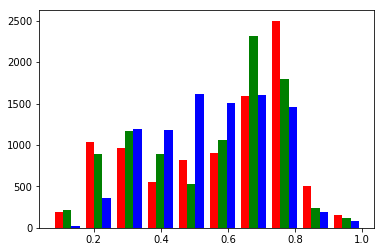

In [3]:
[h,w,D] = colourImage.shape
#AIM Plot 3 histograms, RGB
flatImage = colourImage.flatten()
redImage = flatImage[0::3]
greenImage = flatImage[1::3]
blueImage = flatImage[2::3]
wholeImage = [redImage, greenImage, blueImage]
fig = plt.figure
plt.hist(wholeImage,bins = 10, color = ['red','green','blue'])

## Applying the Mask

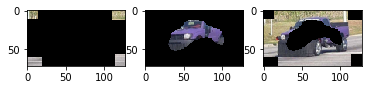

In [4]:
frontMask = colourImage * (np.ones(maskImage3.shape) - maskImage3)
backMask = colourImage * (np.ones(backMaskImage.shape) - backMaskImage)
noMask = colourImage - frontMask - backMask
threeFigs = plt.figure()
ax = threeFigs.add_subplot(131)
ax.imshow(backMask, cmap = 'gray')

ax2 = threeFigs.add_subplot(132)
ax2.imshow(frontMask, cmap = 'gray')

ax3 = threeFigs.add_subplot(133)
ax3.imshow(noMask, cmap = 'gray')

([array([ 15., 213., 431., 302., 382., 249.,   9.,  16.,  16.,   3.]),
  array([ 10., 177., 462., 542., 356.,  35.,  21.,  15.,  15.,   3.]),
  array([  0.,  45., 273., 395., 237., 191., 239., 229.,  23.,   4.])],
 array([1.000e-03, 1.010e-01, 2.010e-01, 3.010e-01, 4.010e-01, 5.010e-01,
        6.010e-01, 7.010e-01, 8.010e-01, 9.010e-01, 1.001e+00]),
 <a list of 3 Lists of Patches objects>)

/Users/conorbarrycullen/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


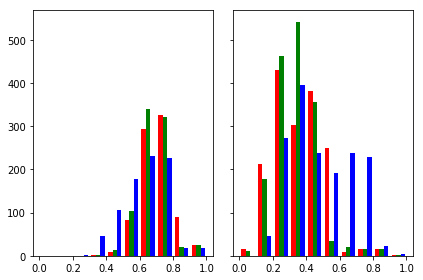

In [5]:
backFlat = backMask.flatten()
frontFlat = frontMask.flatten()
a = backFlat[0::3]
b = backFlat[1::3]
c = backFlat[2::3]
backWhole = [a,b,c]
frontWhole = [frontFlat[0::3],frontFlat[1::3],frontFlat[2::3]]
#backWhole[backWhole == 0] = []
#frontWhole[frontWhole  == 0] = []
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
binpos = np.linspace(0.001,1.001,11)
axs[0].hist(backWhole, bins=binpos , color = ['red','green','blue'])
axs[1].hist(frontWhole, bins=binpos , color = ['red','green','blue'])

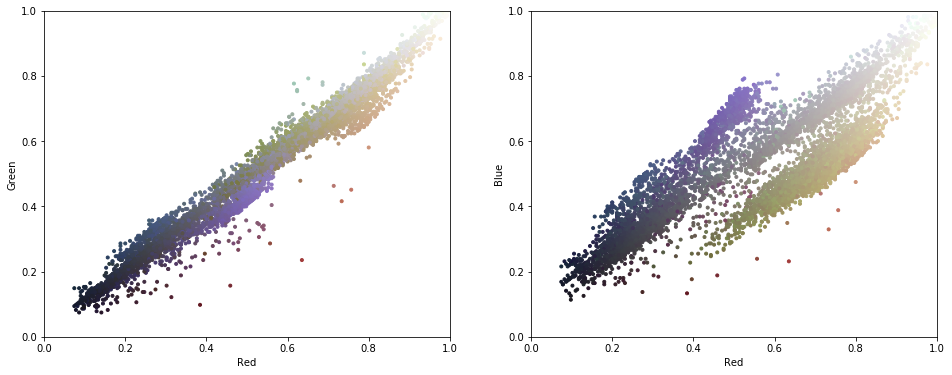

In [6]:
def plot_pixels(data, colors=None, N=100000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

colourNew = colourImage.reshape((h*w,3))   
plot_pixels(colourNew)

In [7]:
kmeans = cluster.KMeans(20)
clusters = kmeans.fit(colourNew)
new_colours = kmeans.cluster_centers_[kmeans.predict(colourNew)]
groups = kmeans.predict(colourNew)
print(groups)

[0 8 3 ... 9 9 9]


In [8]:
clusterCols = np.zeros((20,3))
for thing in range(len(groups)):
    N = groups[thing]
    clusterCols[N] = new_colours[thing]

print(clusterCols)

[[0.71235822 0.6923402  0.69101022]
 [0.25898064 0.26730141 0.32990196]
 [0.45898923 0.45306085 0.49511185]
 [0.8179404  0.79645515 0.78447429]
 [0.58292668 0.56957317 0.41274825]
 [0.50882353 0.44194999 0.70558554]
 [0.35009456 0.35077137 0.46292426]
 [0.14723708 0.14437017 0.21402258]
 [0.93031373 0.92566667 0.902     ]
 [0.63519975 0.62034183 0.63558771]
 [0.76291017 0.73966663 0.73716632]
 [0.64911819 0.62627524 0.46438091]
 [0.76163454 0.71125391 0.56420498]
 [0.22473557 0.22827983 0.27906229]
 [0.43873028 0.37916587 0.60293798]
 [0.49431051 0.48289939 0.33320476]
 [0.56259519 0.54768843 0.57190142]
 [0.81499911 0.76598543 0.63121853]
 [0.31556287 0.31780474 0.37616893]
 [0.71319194 0.666672   0.51272776]]


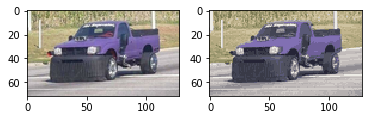

In [9]:
newImage = new_colours.reshape((h,w,3))
#fig = plt.figure
#plt.imshow(newImage)

threeFigs = plt.figure()
ax = threeFigs.add_subplot(121)
ax.imshow(colourImage, cmap = 'gray')

ax2 = threeFigs.add_subplot(122)
ax2.imshow(newImage, cmap = 'gray')

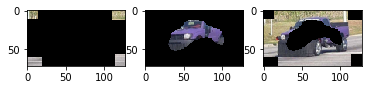

In [10]:
frontMask = colourImage * (np.ones(maskImage3.shape) - maskImage3)
backMask = colourImage * (np.ones(backMaskImage.shape) - backMaskImage)
noMask = colourImage - frontMask - backMask
threeFigs = plt.figure()
ax = threeFigs.add_subplot(131)
ax.imshow(backMask, cmap = 'gray')

ax2 = threeFigs.add_subplot(132)
ax2.imshow(frontMask, cmap = 'gray')

ax3 = threeFigs.add_subplot(133)
ax3.imshow(noMask, cmap = 'gray')

# Number of pixels in each cluster

In [11]:
fig = plt.figure
groups.sort()
sortgroups =  groups+np.ones(groups.shape)
print(sortgroups)
groupMat = np.zeros((20,w*h))
t = 0
for things in range(len(groups)):
    N = int(sortgroups[things] - 1)
    groupMat[N,t] = sortgroups[things]
    if things <= w*h-2:
        if sortgroups[things] == sortgroups[things+1]:
            t += 1
        else:
            t = 0   
print(groupMat)
bins = np.linspace(1,20,20)


[ 1.  1.  1. ... 20. 20. 20.]
[[ 1.  1.  1. ...  0.  0.  0.]
 [ 2.  2.  2. ...  0.  0.  0.]
 [ 3.  3.  3. ...  0.  0.  0.]
 ...
 [18. 18. 18. ...  0.  0.  0.]
 [19. 19. 19. ...  0.  0.  0.]
 [20. 20. 20. ...  0.  0.  0.]]


In [12]:
#plt.hist(groupMat,bins,colors = clusterCols, stacked = True)

# With Mask Overlay on Cluster Values

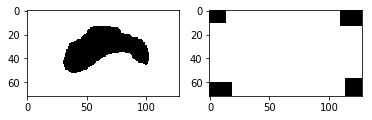

In [13]:
gridFrontMask = maskImage[:,:,0]
#print(gridFrontMask)
flatMask = gridFrontMask.flatten()
maskGroups = (groups+np.ones(groups.shape))*(np.ones(groups.shape)-flatMask)

gridBackMask = backMaskImage[:,:,0]
#print(gridBackMask[50:60,50:60])
flatMaskB = gridBackMask.flatten()
maskGroupsB = (groups+np.ones(groups.shape))*(np.ones(groups.shape)-flatMaskB)

threeFigs = plt.figure()
ax = threeFigs.add_subplot(121)
ax.imshow(gridFrontMask, cmap = 'gray')

ax2 = threeFigs.add_subplot(122)
ax2.imshow(gridBackMask, cmap = 'gray')

(array([  0.,   0.,   0.,  66.,  81., 110., 146., 126., 112., 197., 453.,
        170., 122.,  53.,   0.,   0.,   0.,   0.,   0.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.]),
 <a list of 19 Patch objects>)

/Users/conorbarrycullen/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


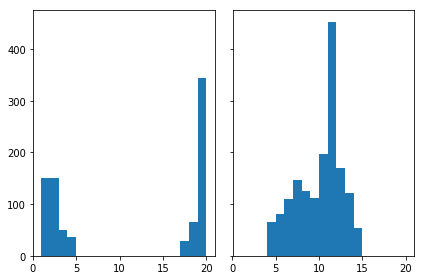

In [14]:
frontMask = np.ones((h,w)) - gridFrontMask
flatMask = frontMask.flatten()
frontGroups = (groups+np.ones(groups.shape))*flatMask

backMask = np.ones((h,w)) - gridBackMask
flatMaskB = backMask.flatten()
backGroups = (groups+np.ones(groups.shape))*flatMaskB

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
binpos = np.linspace(1,20,20)
axs[0].hist(backGroups, bins=binpos)
axs[1].hist(frontGroups, bins=binpos)

# Using ICM


In [15]:
def neighbours(i,j,M,N,size=4):
    # Can expand to size = 8 if i fancy for better results :)
    if size == 4:
        if (i == 0 and j == 0):
            n = [(0,1),(1,0)]
        elif i == 0 and j == N-1:
            n = [(0,N-2),(1,N-1)]
        elif i == M-1 and j == 0:
            n = [(M-1,1),(M-2,0)]
        elif i == M-1 and j == N-1:
            n = [(M-1,N-2),(M-2,N-1)]
        elif i == 0:
            n = [(0,j-1),(0,j+1),(1,j)]
        elif i == M-1:
            n = [(M-1,j-1),(M-1,j+1),(M-2,j)]
        elif j == 0:
            n = [(i-1,0),(i+1,0),(i,1)]
        elif j == N-1:
            n = [(i-1,N-1),(i+1,N-1),(i,N-2)]
        else:
            n = [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
            
        return n
    elif size == 8:
        if (i == 0 and j == 0):
            n = [(0,1),(1,1),(1,0)]
        elif i == 0 and j == N-1:
            n = [(0,N-2),(1,N-1),(1,N-1)]
        elif i == M-1 and j ==0:
            n = [(M-1,1),(M-2,1),(M-2,0)]
        elif i == M-1 and j == N-1:
            n = [(M-1,N-2),(M-2,N-2),(M-2,N-1)]
        elif i == 0:
            n = [(0,j-1),(1,j-1),(0,j+1),(1,j+1),(1,j)]
        elif i == M-1:
            n = [(M-1,j-1),(M-2,j-1),(M-1,j+1),(M-2,j+1),(M-2,j)]
        elif j == 0:
            n = [(i-1,0),(i-1,1),(i+1,0),(i+1,1),(i,1)]
        elif j == N-1:
            n = [(i-1,N-1),(i-1,N-2),(i+1,N-1),(i+1,N-2),(i,N-2)]
        else:
            n = [(i-1,j),(i-1,j-1),(i+1,j),(i+1,j+1),(i,j-1),(i+1,j-1),(i,j+1),(i-1,j+1)]
             
        return n      
    

In [16]:
def w_ij(pxl1,pxl2,Image):
    colour1 = Image[pxl1[0],pxl1[1],:]*255
    colour2 = Image[pxl2[0],pxl2[1],:]*255
    diff = colour1 - colour2
    for i in range(3):
        diff[i] = abs(diff[i])
    dist = math.sqrt(diff[0]**2 + diff[1]**2 + diff[2]**2)
    w_ij = 1/(1+dist)
    return w_ij

In [17]:
def EoX(Image, HiddenImage, Coord,weights):
    A = HiddenImage.shape[0]
    B = HiddenImage.shape[1]
    TotalPixels = A*B #Shape of Image and HiddenImage are equivalent :)
    Neighbours = neighbours(Coord[0],Coord[1],A,B,8)
    #print(Neighbours)
    energy = 0
    for dude in Neighbours:
        x_n = dude[0]
        y_n = dude[1]
        #print(dude)
        alpha = HiddenImage[Coord[0],Coord[1]]
        beta = HiddenImage[dude[0],dude[1]]
        if alpha == 0: # allows the x_i of 0 to gain a value if next to other coloured pixels
            alpha = 1
            #print(beta)
        energy += alpha*beta*w_ij(Coord,dude,weights)
        #print([alpha, beta, energy])
    return energy

def TotalE (Image, HiddenImage, weights):
    energy = 0
    A = Image.shape[0]
    B = Image.shape[1]
    #print([A, B])
    #print(list(range(A)))
    for a in range(A):    
        for b in range(B):
            Coord = [a,b]
            energy += EoX(Image, HiddenImage, Coord, weights)
    return energy


In [18]:
def ICMaPoint (Image, HiddenImage, Coord,weights):
    currentE = int(EoX(Image, HiddenImage,Coord,weights))
    #print(HiddenImage[Coord[0],Coord[1]])
    #print(currentE)
    HiddenImage2 = HiddenImage

    
    pixel = HiddenImage[Coord[0],Coord[1]]
    #if pixel == 0:
        #print(currentE)
    if currentE == 0:
        HiddenImage2[Coord[0],Coord[1]] = 0
    elif currentE > 0 and pixel !=0 :
        HiddenImage2[Coord[0],Coord[1]] = HiddenImage[Coord[0],Coord[1]]
    elif currentE < 0 and pixel !=0:
        HiddenImage2[Coord[0],Coord[1]] = -HiddenImage[Coord[0],Coord[1]]
    elif currentE > 0:
        HiddenImage2[Coord[0],Coord[1]] = 1
    else:
        HiddenImage2[Coord[0],Coord[1]] = -1

        
        
    #if Coord[1] == 11:
        #print(HiddenImage2[Coord[0],Coord[1]])
    return (HiddenImage2[Coord[0],Coord[1]])

Total Energy 13859.794389497967
Total Energy 14716.763901745875
Total Energy 15144.168897360174
Total Energy 15642.006590075858
Total Energy 15810.059557260945
Total Energy 15965.873419581418
Total Energy 16112.581182969889
Total Energy 16224.209707907883
Total Energy 16310.518839728033
Total Energy 16411.848264479515
Total Energy 16518.39697017186
Total Energy 16606.121766429267
Total Energy 16684.14064706911
Total Energy 16775.251932169205
Total Energy 16860.341470136304
Total Energy 16969.51454677546
Total Energy 17042.680781694562
Total Energy 17130.614930499807
Total Energy 17195.675306546058
Total Energy 17258.318473291034
Total Energy 17310.896727967374
Total Energy 17366.246052047027
Total Energy 17405.858288861247
Total Energy 17458.600720901777
Total Energy 17497.72234918124
Total Energy 17539.740453947976
Total Energy 17591.467402154667
Total Energy 17604.062384703888
Total Energy 17605.624911218787
Total Energy 17615.174891829032
Total Energy 17616.73741834393
Total Energy 

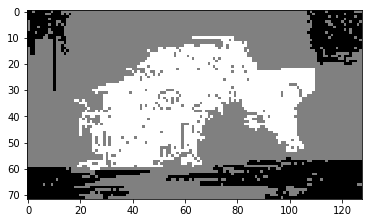

In [19]:
weightsIm = newImage # CHANGE THIS ONE!
maskImage = np.zeros((h,w))+(- (np.ones((h,w))-gridBackMask) + (np.ones((h,w))-gridFrontMask)) #if masks overlap then they will set to zero
#print(maskImage)
workImage = np.copy(maskImage)
MaxIters = 70

fig = plt.figure
plt.imshow(maskImage, cmap='gray')
#workImage[workImage <= 0.5] = -1 #make the issue a closed discrete form
#workImage[workImage > 0.5] = 1
hiddenIm = workImage
hiddenhiddenIm = np.zeros((h,w))

TotalEnergy = TotalE(workImage,hiddenIm,weightsIm)
currentE = TotalEnergy
[A,B] = workImage.shape
#[A,B] = [20,20]
#print(A)
for Iters in range(MaxIters):
    for a in range(A):
        for b in range(B):
            Coord = [a,b]
            hiddenhiddenIm[a,b] = ICMaPoint(workImage,hiddenIm,Coord,weightsIm)
            #print(b)
        #print(a)
    TotalEnergy = TotalE(workImage,hiddenIm,weightsIm)
    print("Total Energy",TotalEnergy)
    if TotalEnergy == currentE:
        print("Number of iterations:",Iters)
        break
    hiddenIm = hiddenhiddenIm
    currentE =TotalEnergy
fig = plt.figure
plt.imshow(hiddenIm, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


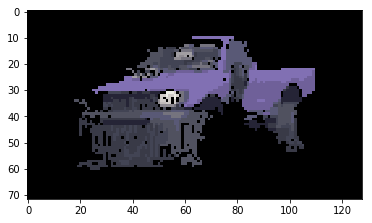

In [20]:
UnmaskedPic = np.zeros((h,w,3))
UnmaskedPic[:,:,1] = newImage[:,:,1] * hiddenIm
UnmaskedPic[:,:,2] = newImage[:,:,2] * hiddenIm
UnmaskedPic[:,:,0] = newImage[:,:,0] * hiddenIm
fig = plt.figure
plt.imshow(UnmaskedPic, cmap='gray')

(array([  0.,   0.,  16., 101., 100., 126., 189., 151., 136., 232., 501.,
        242., 237., 207.,  83.,  32.,  66.,  29.,   0.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.]),
 <a list of 19 Patch objects>)

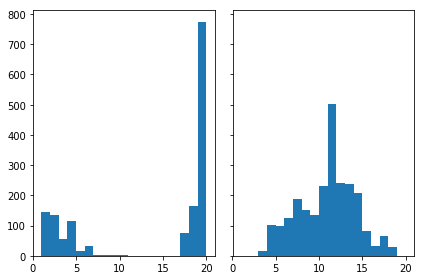

In [21]:
gridFrontMask2 = np.where(hiddenIm == 1, 0, 1)
frontMask2 = np.ones((h,w)) - gridFrontMask2
flatMask2 = frontMask2.flatten()
frontGroups2 = (groups+np.ones(groups.shape))*flatMask2

gridBackMask2 = np.where(hiddenIm == -1, 0, 1)
backMask2 = np.ones((h,w)) - gridBackMask2
flatMaskB2 = backMask2.flatten()
backGroups2 = (groups+np.ones(groups.shape))*flatMaskB2

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
binpos = np.linspace(1,20,20)
axs[0].hist(backGroups2, bins=binpos)
axs[1].hist(frontGroups2, bins=binpos)